#### Visualization of Temporal Series EDA
#### Objective

The primary aim of this analysis is to investigate the temporal trends in Bitcoin (BTC) and the S&P 500 index.
Key goals include:
1. Understanding the trends in prices and volumes for both BTC and S&P 500 at multiple time intervals (weekly, monthly, quarterly, yearly).
2. Comparing the volatility of BTC against the more stable behavior of the S&P 500.
3. Analyzing whether significant correlations exist between the two datasets over time.
4. Enhancing the analysis with visual tools to support insights and interpretations.


In [106]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [107]:
btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

btc_data['Date'] = pd.to_datetime(btc_data['Date']) # !IMPORTANT
sp500_data['Date'] = pd.to_datetime(sp500_data['Date']) # !IMPORTANT

# Rename the 'Close' and 'Volume' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

btc_data.rename(columns={"Volume": "BTC_Volume"}, inplace=True)
sp500_data.rename(columns={"Volume": "SP500_Volume"}, inplace=True)

#### Review for each dataset graphs, closing price over the time

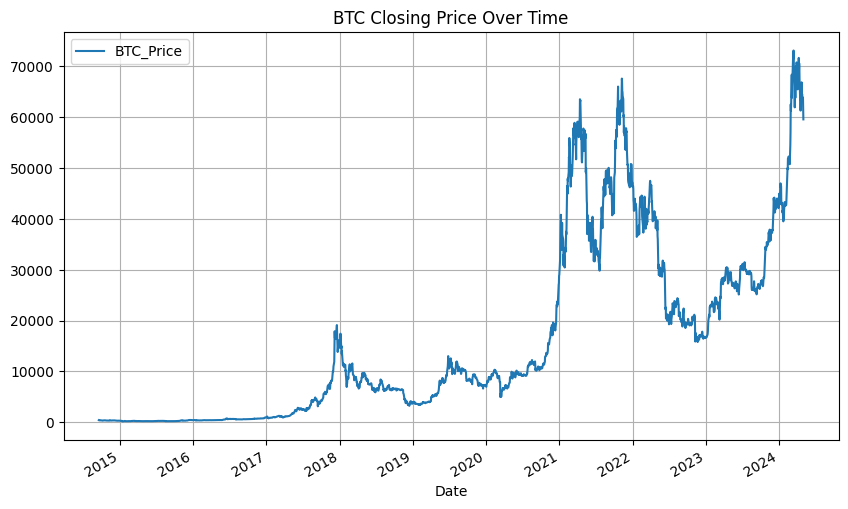

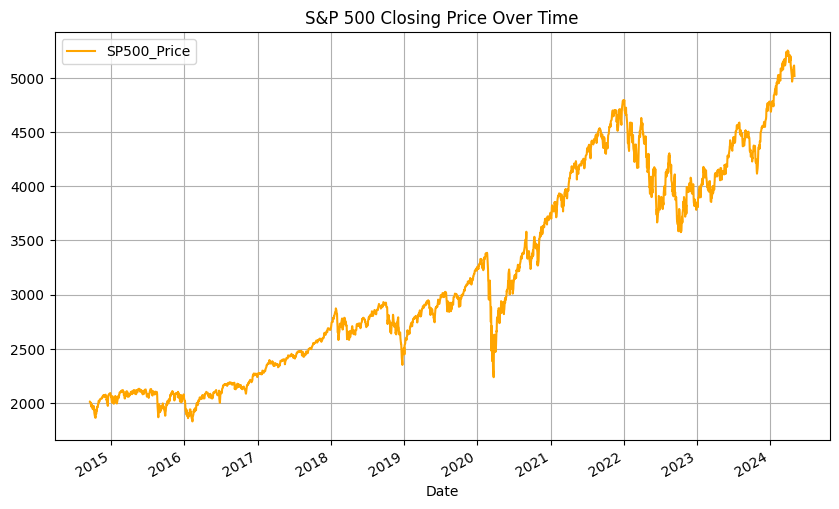

In [108]:
# BTC Closing Price
(
  btc_data.plot(
    x='Date', 
    y='BTC_Price', 
    title='BTC Closing Price Over Time', 
    figsize=(10, 6), 
    grid=True)
)
plt.show()

# S&P 500 Closing Price
(
  sp500_data.plot(
    x='Date', 
    y='SP500_Price', 
    title='S&P 500 Closing Price Over Time', 
    figsize=(10, 6), 
    color='orange', 
    grid=True)
)
plt.show()

#### Merging Datasets with the 4 columns needed for this EDA

In [109]:
# Select the relevant columns for each dataset
btc_selected = btc_data[['Date', 'BTC_Price', 'BTC_Volume']]
sp500_selected = sp500_data[['Date', 'SP500_Price', 'SP500_Volume']]

# Merge both datasets using the column 'Date'
merged_data = pd.merge(btc_selected, sp500_selected, on='Date')

# Set the 'Date' column as the index for easier resampling
merged_data.set_index('Date', inplace=True)

merged_data.to_csv('./Data/btc_sp500_price_volume_merged.csv')
merged_data

,BTC_Price,BTC_Volume,SP500_Price,SP500_Volume
Date,,,,
2014-09-18,424.440002,3.448320e+07,2011.359985,3235340000
2014-09-19,394.795990,3.791970e+07,2010.400024,4880220000
2014-09-22,402.152008,2.412760e+07,1994.290039,3349670000
2014-09-23,435.790985,4.509950e+07,1982.770020,3279350000
2014-09-24,423.204987,3.062770e+07,1998.300049,3313850000
...,...,...,...,...
2024-04-24,64276.898438,3.027666e+10,5071.629883,3656740000
2024-04-25,64481.707031,3.215579e+10,5048.419922,3958050000
2024-04-26,63755.320313,2.413937e+10,5099.959961,3604140000


#### Resample data to calculate: Total transacion volume and Prices for different intervals

In [110]:
# Resample the data to calculate mean prices and sum total volumes for different intevals

# Price Analisis
weekly_data = merged_data.resample('W').mean() # Weekly average
monthly_data = merged_data.resample('ME').mean() # Montlhy average
quarterly_data = merged_data.resample('QE').mean() # Quarterly average
annual_data = merged_data.resample('YE').mean() # Annual average

# Function for resample, group and sum different volumes in different frequencies
def analyze_volume_by_frequency(data, freq):
    return data.resample(freq).agg({
        'BTC_Volume': 'sum',
        'SP500_Volume': 'sum'
    })

# Volume Analisis
weekly_volume = analyze_volume_by_frequency(merged_data, 'W')
monthly_volume = analyze_volume_by_frequency(merged_data, 'ME')
quarterly_volume = analyze_volume_by_frequency(merged_data, 'QE')
annual_volume = analyze_volume_by_frequency(merged_data, 'YE')

#### Plot the results to visualize trends for price and volumes

In [111]:
# Fucntion for graph Volumes
def plot_btc_sp500_volume(
  data,                 # DataFrame
  y_column_btc,         # Column for Bitcoin value (price or volume)
  y_column_sp500,       # Column for the value of the S&P 500 (price or volume)
  label_btc,            # Label for Bitcoin (e.g., 'Bitcoin Price', 'Bitcoin Volume')
  label_sp500,          # Label for S&P 500 (e.g., 'S&P 500 Price', 'S&P 500 Volume')
  title,                # Title of the graph
  ylabel,               # Label for the Y axis (e.g., 'Average Price', 'Transaction Volume')
  figsize=(12, 6)       # Figure size
):
  # Create the figure and axis
  fig, ax = plt.subplots(figsize=figsize)
  
  # Plot the data, scaling Y-axis by dividing by 1e6 (1 million)
  ax.plot(data.index, data[y_column_btc] / 1e6, label=label_btc, alpha=0.8)
  ax.plot(data.index, data[y_column_sp500] / 1e6, label=label_sp500, alpha=0.8)
  
  # Set title and labels
  ax.set_title(title)
  ax.set_xlabel('Date')
  ax.set_ylabel(f'{ylabel} (per 1 million units)', fontsize=14)
  ax.legend()
  ax.grid(True)
  
  # Customizing Y-axis formatting
  ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

In [112]:
# Fucntion for graph Prices
def plot_btc_sp500_prices(
  data,                 # DataFrame
  y_column_btc,         # Column for Bitcoin value (price or volume)
  y_column_sp500,       # Column for the value of the S&P 500 (price or volume)
  label_btc,            # Label for Bitcoin (e.g., 'Bitcoin Price', 'Bitcoin Volume')
  label_sp500,          # Label for S&P 500 (e.g., 'S&P 500 Price', 'S&P 500 Volume')
  title,                # Title of the graph
  figsize=(12, 6)       # Figure size
):
  # Create the figure and axis
  fig, ax = plt.subplots(figsize=figsize)
  
  # Plot the data
  ax.plot(data.index, data[y_column_btc], label=label_btc, alpha=0.8)
  ax.plot(data.index, data[y_column_sp500], label=label_sp500, alpha=0.8)
  
  # Set title and labels
  ax.set_title(title)
  ax.set_xlabel('Date')
  ax.set_ylabel('Average Price (USD)', fontsize=14)
  ax.legend()
  ax.grid(True)
  
  # Customizing Y-axis formatting
  ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

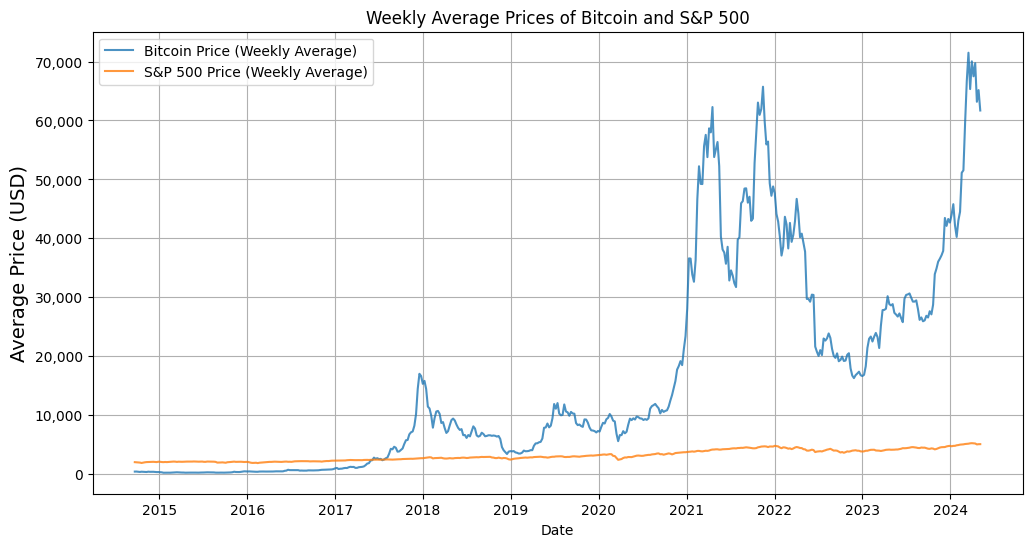

In [113]:
# Weekly Trend Price
plot_btc_sp500_prices(
  weekly_data,
  y_column_btc= 'BTC_Price',
  y_column_sp500= 'SP500_Price', 
  label_btc= 'Bitcoin Price (Weekly Average)',
  label_sp500= 'S&P 500 Price (Weekly Average)',
  title= 'Weekly Average Prices of Bitcoin and S&P 500',
)

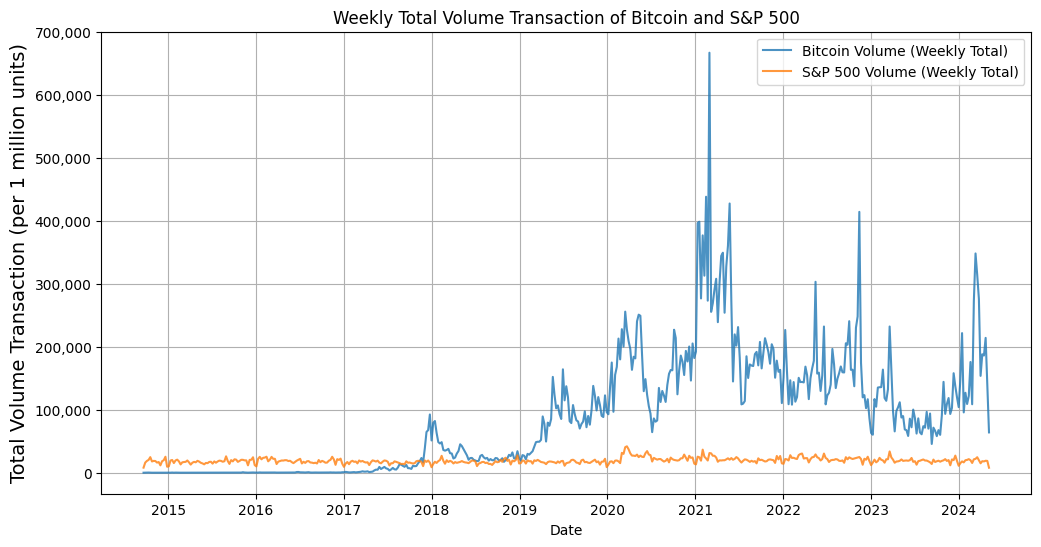

In [114]:
# Weekly Trend Volume
plot_btc_sp500_volume(
  weekly_volume,
  y_column_btc= 'BTC_Volume',
  y_column_sp500= 'SP500_Volume', 
  label_btc= 'Bitcoin Volume (Weekly Total)',
  label_sp500= 'S&P 500 Volume (Weekly Total)',
  title= 'Weekly Total Volume Transaction of Bitcoin and S&P 500',
  ylabel= 'Total Volume Transaction'
)

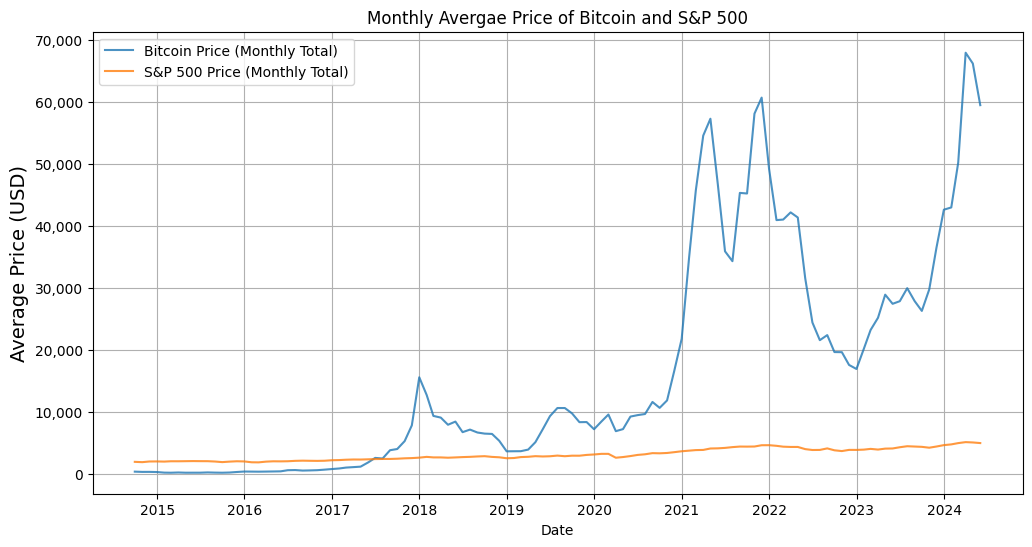

In [ ]:
# Monthly Trend Price
plot_btc_sp500_prices(
  monthly_data,
  y_column_btc= 'BTC_Price',
  y_column_sp500= 'SP500_Price', 
  label_btc= 'Bitcoin Price (Monthly Total)',
  label_sp500= 'S&P 500 Price (Monthly Total)',
  title= 'Monthly Average Price of Bitcoin and S&P 500',
)

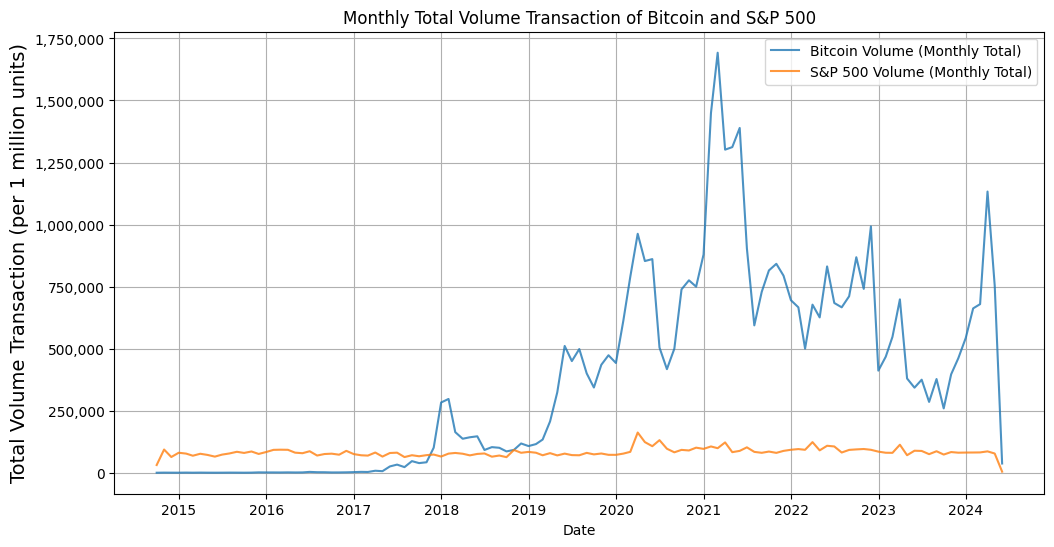

In [116]:
# Monthly Trend Volume
plot_btc_sp500_volume(
  monthly_volume,
  y_column_btc= 'BTC_Volume',
  y_column_sp500= 'SP500_Volume', 
  label_btc= 'Bitcoin Volume (Monthly Total)',
  label_sp500= 'S&P 500 Volume (Monthly Total)',
  title= 'Monthly Total Volume Transaction of Bitcoin and S&P 500',
  ylabel= 'Total Volume Transaction'
)

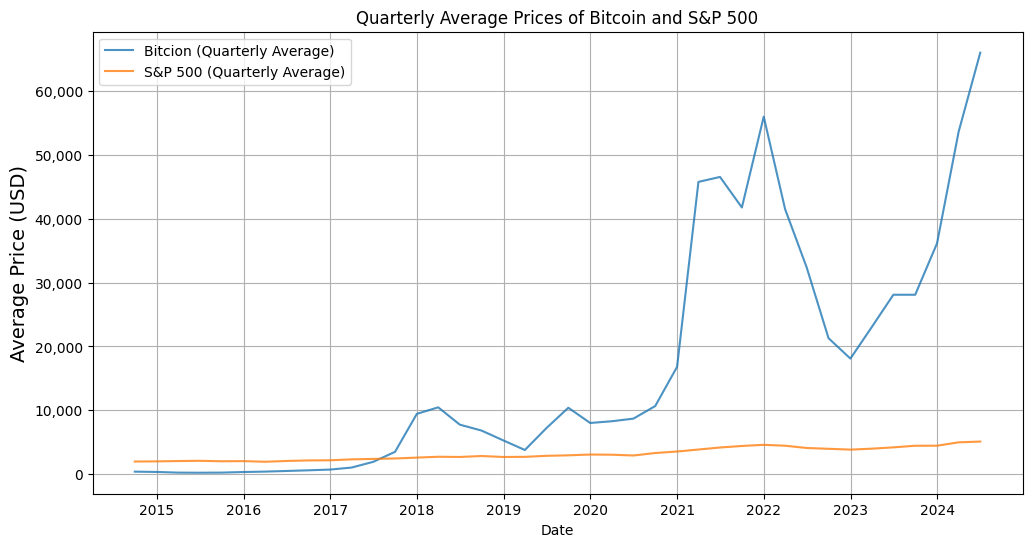

In [119]:
# Quarterly trend Price
plot_btc_sp500_prices(
  data=quarterly_data,
  y_column_btc='BTC_Price',
  y_column_sp500='SP500_Price',
  label_btc='Bitcion (Quarterly Average)',
  label_sp500='S&P 500 (Quarterly Average)',
  title='Quarterly Average Prices of Bitcoin and S&P 500',
)

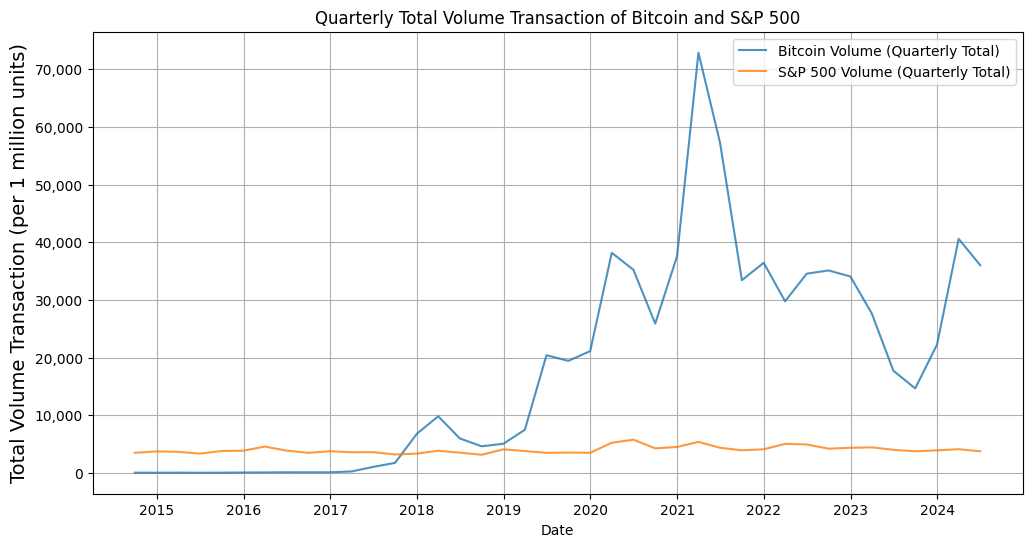

In [ ]:
# Quarterly trend Volumen transactions
plot_btc_sp500_volume(
  data=quarterly_data,
  y_column_btc='BTC_Volume',
  y_column_sp500='SP500_Volume',
  label_btc='Bitcoin Volume (Quarterly Total)',
  label_sp500='S&P 500 Volume (Quarterly Total)',
  title='Quarterly Total Volume Transaction of Bitcoin and S&P 500',
  ylabel= 'Total Volume Transaction'
)

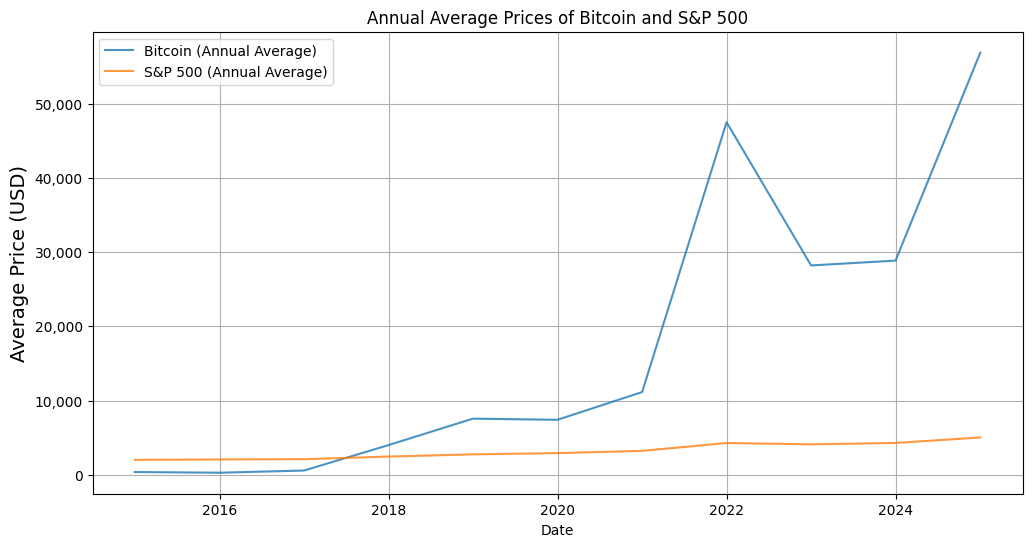

In [ ]:
# Annual Trend Price
plot_btc_sp500_prices(
  data=annual_data,
  y_column_btc='BTC_Price',
  y_column_sp500='SP500_Price',
  label_btc='Bitcoin (Annual Average)',
  label_sp500='S&P 500 (Annual Average)',
  title='Annual Average Prices of Bitcoin and S&P 500',
)

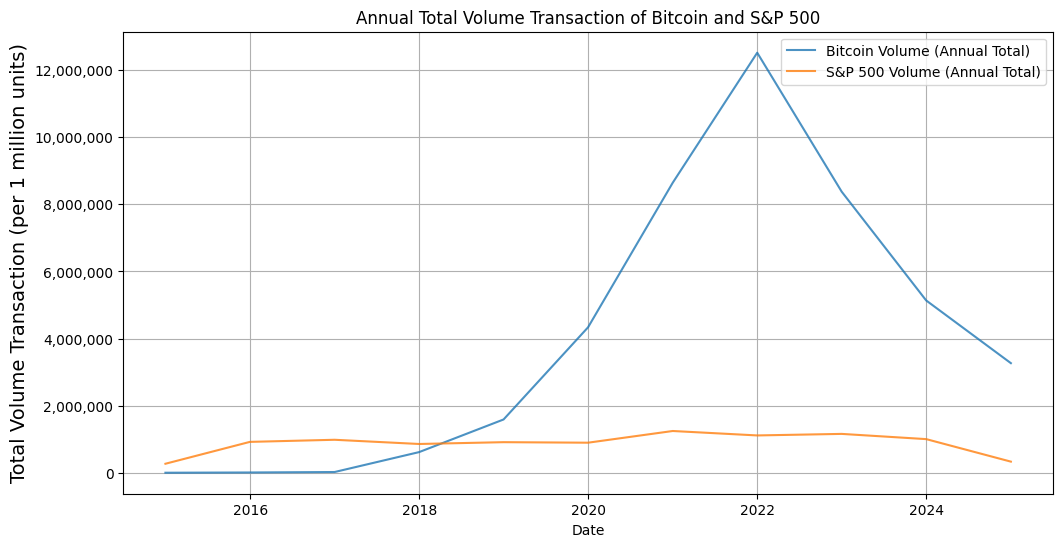

In [129]:
# Annual trend Volumen transactions
plot_btc_sp500_volume(
  data=annual_volume,
  y_column_btc='BTC_Volume',
  y_column_sp500='SP500_Volume',
  label_btc='Bitcoin Volume (Annual Total)',
  label_sp500='S&P 500 Volume (Annual Total)',
  title='Annual Total Volume Transaction of Bitcoin and S&P 500',
  ylabel= 'Total Volume Transaction'
)

### Observations and Conclusions

From the temporal analysis, the following insights were derived:

1. **Bitcoin Volatility**:
    - Bitcoin exhibits extreme volatility, with sharp price spikes and corrections over time.
    - The S&P 500 shows a more consistent upward trend, reflecting its position as a stable market index.

2. **Volume Trends**:
    - Bitcoin's transaction volumes are highly variable, with significant peaks corresponding to price surges.
    - S&P 500 transaction volumes are relatively stable, indicating steady trading activity.

3. **Correlation**:
    - Preliminary observations suggest limited correlation between BTC and S&P 500 prices and volumes, though further statistical analysis is recommended.

4. **Aggregate Trends**:
    - Weekly and monthly trends highlight short-term market movements, while quarterly and annual aggregations show broader patterns.

5. **Recommendations for Further Analysis**:
    - Conduct a correlation analysis using Pearson or Spearman coefficients to quantify relationships between BTC and S&P 500. (See file `5_Insights_Analysis_Crisis_2020-2024`)
    - Investigate external factors influencing both datasets, such as macroeconomic indicators or global market events.

